In [4]:
import json
import glob
import pandas as pd

In [8]:
csv_file = open('personal.csv', 'w')
all_file = open('anime_desc.txt', 'w')

In [9]:
import json
files = glob.glob('anime/*.json', recursive=True)

genres = {}
tags = {}
total = 0
total_sfw = 0
animes = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
    media = data['data']['Page']['media']
    for anime in media:
        total += 1
        animes.append(anime)

        if anime['description'] is not None:
            # escape any newline characters in the description
            all_file.write(f"{anime['description'].encode('unicode_escape').decode('utf-8')}\n")

        # if anime['isAdult']:
        #     continue
        total_sfw += 1

        for genre in anime['genres']:
            if genre not in genres:
                genres[genre] = 1
            else:
                genres[genre] += 1
        for tag in anime['tags']:
            if tag['name'] not in tags:
                tags[tag['name']] = 1
            else:
                tags[tag['name']] += 1

with open('anime.json', 'w') as f:
    f.write(json.dumps(animes, indent='\t'))

# sort genres by most common
genres = dict(sorted(genres.items(), key=lambda item: item[1], reverse=True))
tags = dict(sorted(tags.items(), key=lambda item: item[1], reverse=True))
print(f'---  anime ({total_sfw} / ({total}))  ---')
print(f'--- genres ({len(genres)}) ---')
for i, genre in enumerate(genres, start=1):
    print(f"{i}\t{genre}\t{genres[genre]}")
print(f'---  tags ({len(tags)})  ---')
for i, tag in enumerate(tags, start=1):
    print(f"{i}\t{tag}\t{tags[tag]}")

---  anime (19652 / (19652))  ---
--- genres (19) ---
1	Comedy	6460
2	Action	4809
3	Fantasy	4253
4	Adventure	3559
5	Drama	3100
6	Sci-Fi	2845
7	Romance	2555
8	Slice of Life	2553
9	Supernatural	1680
10	Hentai	1533
11	Mecha	1119
12	Ecchi	950
13	Psychological	916
14	Mystery	885
15	Sports	828
16	Music	797
17	Horror	538
18	Mahou Shoujo	431
19	Thriller	218
---  tags (370)  ---
1	Male Protagonist	3439
2	Female Protagonist	2937
3	School	2557
4	Primarily Female Cast	1914
5	Shounen	1796
6	Magic	1702
7	Kids	1423
8	Tragedy	1376
9	Heterosexual	1370
10	Nudity	1321
11	Kuudere	1295
12	Full CGI	1287
13	Primarily Adult Cast	1222
14	Super Power	1191
15	Animals	1157
16	Ensemble Cast	1134
17	Primarily Male Cast	1020
18	Historical	1015
19	CGI	993
20	Episodic	983
21	Female Harem	966
22	Seinen	934
23	Demons	890
24	Swordplay	848
25	Cute Girls Doing Cute Things	840
26	Parody	837
27	Primarily Teen Cast	833
28	Military	804
29	Coming of Age	788
30	Urban Fantasy	762
31	Isekai	759
32	Aliens	750
33	Idol	739
34	Foreign

In [ ]:
# keep Isekai, school

In [5]:
genres = {}
tags = {}
total = 0
total_nsfw = 0
animes = []

with open('anime.json', 'r') as f:
    data = json.load(f)

for anime in data:
    total += 1
    animes.append(anime)

    if anime['isAdult']:
        total_nsfw += 1

    for genre in anime['genres']:
        if genre not in genres:
            genres[genre] = {
                'normal': 0 if anime['isAdult'] else 1,
                'nsfw': 1 if anime['isAdult'] else 0
            }
        else:
            genres[genre]['nsfw' if anime['isAdult'] else 'normal'] += 1

    for tag in anime['tags']:
        if tag['name'] not in tags:
            tags[tag['name']] = {
                'normal': 0 if anime['isAdult'] else 1,
                'nsfw': 1 if anime['isAdult'] else 0
            }
        else:
            tags[tag['name']]['nsfw' if anime['isAdult'] else 'normal'] += 1

# sort genres by most common
genres = dict(sorted(genres.items(), key=lambda item: item[1]['normal'], reverse=True))
tags = dict(sorted(tags.items(), key=lambda item: item[1]['normal'], reverse=True))

# do this so i get index and dont need to transpose
flat_genres = [ (genre, *list(genres[genre].values())) for genre in genres ]
flat_tags   = [ (tag,   *list(tags[tag].values())    ) for tag in tags ]

df_genres = pd.DataFrame(flat_genres, columns=[ 'genre', 'normal', 'nsfw' ])
df_tags   = pd.DataFrame(flat_tags, columns=[ 'tag', 'normal', 'nsfw' ])

print(f'---  nsfw ({total_nsfw} / {total})  ---')
print(f'--- genres ({len(genres)}) ---')
display(df_genres.sort_values(by=[ 'normal' ], ascending=False))
pd.set_option('display.max_rows', len(tags))
print(f'---  tags ({len(tags)})  ---')
display(df_tags.sort_values(by=[ 'normal' ], ascending=False))

---  nsfw (1585 / 19652)  ---
--- genres (19) ---


,genre,normal,nsfw
0,Comedy,6378,82
1,Action,4755,54
2,Fantasy,4141,112
3,Adventure,3536,23
4,Drama,3047,53
5,Sci-Fi,2807,38
6,Slice of Life,2544,9
7,Romance,2336,219
8,Supernatural,1613,67
9,Mecha,1112,7


---  tags (370)  ---


,tag,normal,nsfw
0,Male Protagonist,3295,144
1,Female Protagonist,2800,137
2,School,2284,273
3,Primarily Female Cast,1834,80
4,Shounen,1793,3
5,Magic,1633,69
6,Kids,1423,0
7,Tragedy,1356,20
8,Kuudere,1290,5
9,Full CGI,1283,4


## Picking tags to use
i would like to pick whatever i want.
but for testing, i need to pick things that have no correlation

i think i need to one hot encode them
i will do genres. there are less and they are more obvi

In [6]:
anime_genres = []
for anime in animes:
    one_hot_genres = []
    for g in genres:
        found = False
        for genre in anime['genres']:
            if genre == g:
                one_hot_genres.append(True)
                found = True
        if not found:
            one_hot_genres.append(False)
    anime_genres.append(one_hot_genres)

ohe_genres = pd.DataFrame(anime_genres, columns=genres)
display(ohe_genres)

threshold = 300
anime_tags = []
for anime in animes:
    one_hot_tags = []
    for t in tags:
        if tags[t]['normal'] < threshold:
            continue
        found = False
        for tag in anime['tags']:
            if tag['name'] == t:
                one_hot_tags.append(True)
                found = True
        if not found:
            one_hot_tags.append(False)
    anime_tags.append(one_hot_tags)

cols = df_tags[df_tags['normal'] >= threshold]['tag']
ohe_tags = pd.DataFrame(anime_tags, columns=cols)
display(ohe_tags)

,Comedy,Action,Fantasy,Adventure,Drama,Sci-Fi,Slice of Life,Romance,Supernatural,Mecha,Ecchi,Psychological,Mystery,Sports,Music,Horror,Mahou Shoujo,Thriller,Hentai
0,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
19648,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
19649,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
19650,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


tag,Male Protagonist,Female Protagonist,School,Primarily Female Cast,Shounen,Magic,Kids,Tragedy,Kuudere,Full CGI,...,Kemonomimi,Real Robot,Mythology,Detective,Bullying,Twins,Body Horror,Educational,Memory Manipulation,Tomboy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19648,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19649,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
19650,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Diag Quirk
we remove the diag because we have so much data, that the diag is super dark and everything else isnt
things are correlated, but not one to one

## Get Least similar
we are doing the ones that have the **most** entries, but the **least** correlated
this means we will get a good number of non similar fields

I want shows that have no correlation with anything selected
- sol and action may have no correlation;
- action and comedy may have no correlation;
- but sol and comedy might.
- meaning i cant use comedy

so i need n shows, where all of them have 0 correlation

Slice of Life  Action          -0.192481
Hentai         Comedy          -0.177696
Action         Hentai          -0.143498
Adventure      Slice of Life   -0.127083
               Hentai          -0.125949
Sci-Fi         Slice of Life   -0.118975
Comedy         Psychological   -0.118244
Hentai         Drama           -0.109223
Slice of Life  Hentai          -0.109008
Fantasy        Hentai          -0.104945
dtype: float64


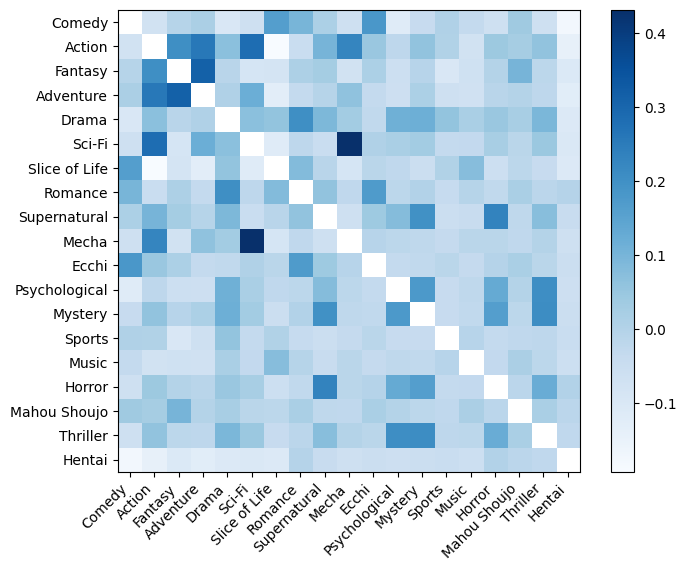

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# dataframe ["target"] = dataset. target  
corr_genres = ohe_genres.corr()

# Unstack the correlation corr_genres to get pairs of columns and their correlations
unstacked_corr = corr_genres.unstack()
# Sort the correlations in ascending order
sorted_corr = unstacked_corr.sort_values()
# Print the lowest correlations
# we do a step of 2 so we do not double print
"""
Slice of Life  Action          -0.192481
Action         Slice of Life   -0.192481
"""
print(sorted_corr[:20:2])

# remove the diag
np.fill_diagonal(corr_genres.values, np.nan)

plt.figure(figsize=(8, 6))  # Adjust width and height as needed

#plotting correlation corr_genres 
plt.imshow(corr_genres, cmap='Blues')

#adding colorbar 
plt.colorbar()

# Adding labels to the corr_genres
plt.xticks(range(len(corr_genres)), df_genres['genre'], rotation=45, ha='right')
plt.yticks(range(len(corr_genres)), df_genres['genre'])

# Display the plot
plt.show()

tag                    tag                 
Full CGI               School                 -0.078538
School                 Primarily Adult Cast   -0.075786
Primarily Female Cast  Primarily Male Cast    -0.075311
Seinen                 Shounen                -0.070844
Primarily Adult Cast   Kids                   -0.070318
Nudity                 Kids                   -0.070298
Kids                   Heterosexual           -0.068774
                       Shounen                -0.066125
Full CGI               Shounen                -0.066112
Kids                   Seinen                 -0.062412
dtype: float64


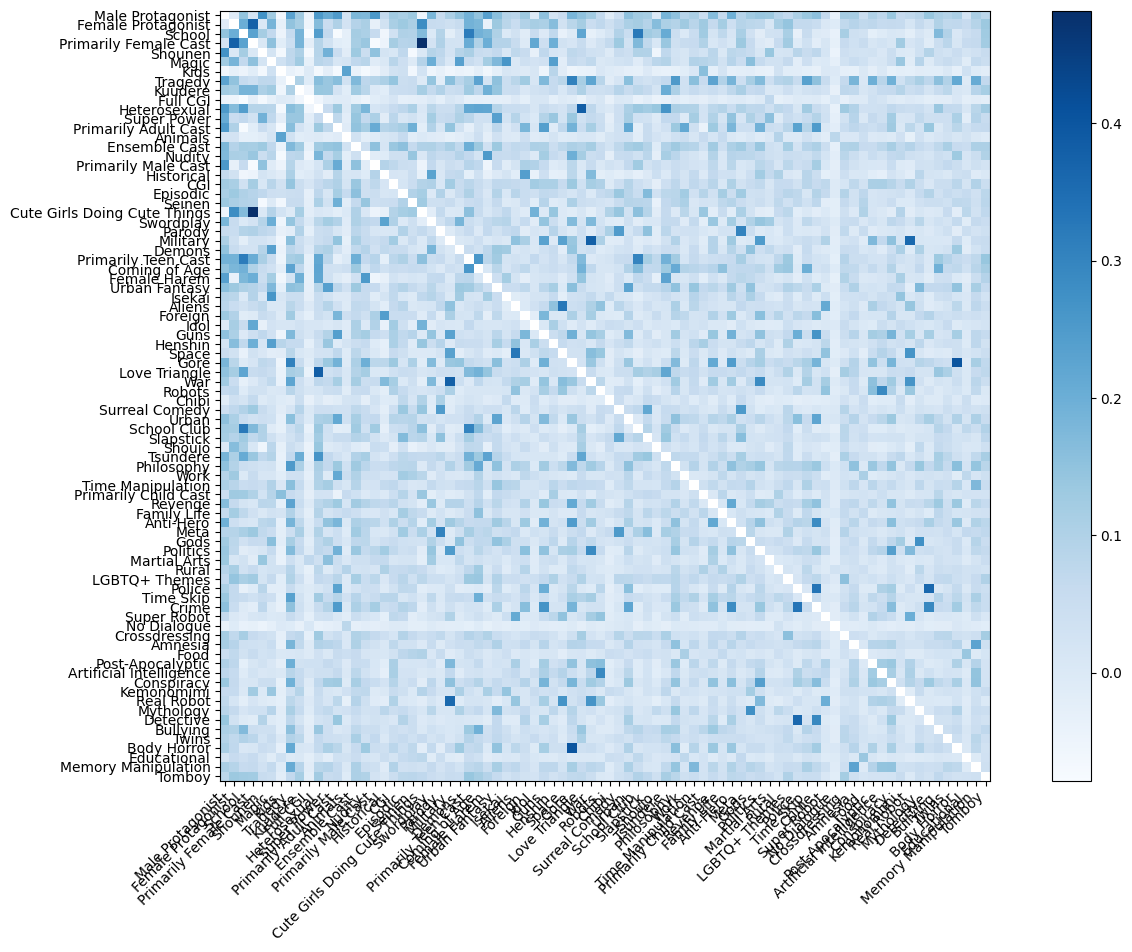

In [8]:
import matplotlib.pyplot as plt
# dataframe ["target"] = dataset. target  
matrix = ohe_tags.corr()

# Unstack the correlation matrix to get pairs of columns and their correlations
unstacked_corr = matrix.unstack()
# Sort the correlations in ascending order
sorted_corr = unstacked_corr.sort_values()
# Print the lowest correlations
print(sorted_corr[:20:2])

# remove the diag
np.fill_diagonal(matrix.values, np.nan)

plt.figure(figsize=(16, 10))  # Adjust width and height as needed

#plotting correlation matrix 
plt.imshow(matrix, cmap='Blues')

#adding colorbar 
plt.colorbar()

threshold = 300
cols = df_tags[df_tags['normal'] >= threshold]['tag']

# Adding labels to the matrix
plt.xticks(range(len(matrix)), cols, rotation=45, ha='right')
plt.yticks(range(len(matrix)), cols)

# Display the plot
plt.show()

## Least Correlated
- I need to find what are the least correlated
- they cannot have any similarities, as stated above
- this sounds like either system of equations or vector space problem
- ill do vector space, cause i know how it might be done, and sounds fun

i will use the following table for testing, because we can only see 3d
|            | Comedy   | Action   | Horror   |
|------------|----------|----------|----------|
| **Comedy** | 1        | 0.3      | 0        |
| **Action** | 0.3      | 1        | 0.2      |
| **Horror** | 0        | 0.2      | 1        |

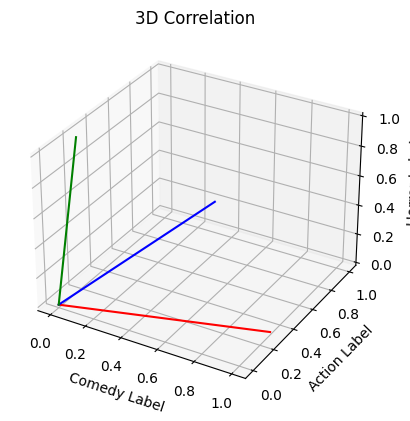

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define data points for the ray
comdey_ray = [0, 1]  # x-coordinates of the ray
action_ray = [0, 0.3]  # y-coordinates of the ray
horror_ray = [0, 0]  # z-coordinates of the ray

# Plot the ray
ax.plot(comdey_ray, action_ray, horror_ray, color='r')
# ax.text([0, 1], [0, 0.3], [0, 0], "(1, 0.3, 0)", size=20, zorder=1, color='k')

# action
ax.plot([0, 0.3], [0, 1], [0, 0.2], color='b')
# ax.text([0, 0.3], [0, 1], [0, 0.2], "(0.3, 1, 0.2)", size=20, zorder=1, color='k')

# horror
ax.plot([0, 0], [0, 0.2], [0, 1], color='g')
# ax.text([0, 0], [0, 0.2], [0, 1], "(0, 0.2, 1)", size=20, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('Comedy Label')
ax.set_ylabel('Action Label')
ax.set_zlabel('Horror Label')
ax.set_title('3D Correlation')

# Show the plot
plt.show()

- I think i just want unique points. so each one has to be as close to its own as possible
- could do some fancy stuff, seeing which element it is closet to, and how they all compare
- but i can just find the ones with the least distance from their origin

In [10]:
com_corr = np.array([ 1, 0.3, 0 ])
act_corr = np.array([ 0.3, 1, 0.2 ])
hor_corr = np.array([ 0, 0.2, 1 ])

dist = np.linalg.norm(np.array([ 1, 0, 0 ]) - com_corr)
dist

0.3

Really, i want to make sure the ones i pick are not related

In [11]:
mags = []
for i, (idx, row)in enumerate(ohe_genres.corr().iterrows()):
    np_row = row.to_numpy()

    np_perfect = np.zeros(len(np_row))
    np_perfect[i] = 1
    
    # print(f"{idx:10}\t{np.linalg.norm(np_perfect-np_row)}")
    mags.append((idx, np.linalg.norm(np_perfect-np_row)))
df_mags = pd.DataFrame(mags)
display(df_mags.sort_values(by=[ 1 ]))

,0,1
16,Mahou Shoujo,0.129894
13,Sports,0.178519
14,Music,0.180362
10,Ecchi,0.273900
7,Romance,0.313816
15,Horror,0.355884
4,Drama,0.357132
17,Thriller,0.358575
18,Hentai,0.367949
11,Psychological,0.372871


## Covnert to CSV
- I just took fields i wanted

In [17]:
import csv

ohes = [ 'Comedy', 'Romance', 'Action', 'Horror' ]
with open('anime.csv', 'w') as f:
    csver = csv.writer(f)
    csver.writerow([ 'isAdult', *ohes, 'description' ])
    for anime in animes:
        if anime['description'] is None:
            continue

        # this will add items that have all ohes as false
        row = [ anime['isAdult'] ]
        for genre in ohes:
            if genre in anime['genres']:
                row.append(True)
            else:
                row.append(False)
        row.append(anime['description'].encode('unicode_escape').decode('utf-8'))
        
        csver.writerow(row)